In [1]:
import rasterio

In [2]:
data = 'F:\\Milan_LinkedIn\\GHS_POP_E2025_GLOBE_R2023A_4326_30ss_V1_0_R7_C27\\GHS_POP_E2025_GLOBE_R2023A_4326_30ss_V1_0_R7_C27.tif'

In [3]:
with rasterio.open(data) as src:

    data = src.read(1)
    out_meta = src.meta.copy()

    bounds = src.bounds
    resolution = src.res
    mean_val = data.mean()
    min_val = data.min()
    max_val = data.max()

In [4]:
out_meta

{'driver': 'GTiff',
 'dtype': 'float64',
 'nodata': None,
 'width': 1200,
 'height': 1200,
 'count': 1,
 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'),
 'transform': Affine(0.008333333300326923, 0.0, 79.9920830388997,
        0.0, -0.00833333329979504, 29.099583419121316)}

In [5]:
bounds

BoundingBox(left=79.9920830388997, bottom=19.099583459367267, right=89.992082999292, top=29.099583419121316)

In [6]:
 mean_val

428.153721266676

In [7]:
 resolution

(0.008333333300326923, 0.00833333329979504)

Clip Real World raster data eith vector data

In [8]:
import geopandas as gpd
from shapely.geometry import box
from rasterio.mask import mask

In [15]:
bbox = box(80, 20, 90, 30)
gdf = gpd.GeoDataFrame({'geometry': bbox}, index = [0], crs = 'EPSG:4326')
gdf

,geometry
0,"POLYGON ((90 20, 90 30, 80 30, 80 20, 90 20))"


<Axes: >

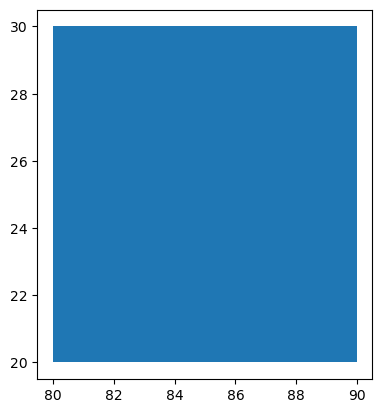

In [16]:
gdf.plot()

In [17]:
gdf.to_file('bbox.geojson', driver = 'GeoJSON')

Clip the raster

In [12]:
raster_file = 'F:\\Milan_LinkedIn\\GHS_POP_E2025_GLOBE_R2023A_4326_30ss_V1_0_R7_C27\\GHS_POP_E2025_GLOBE_R2023A_4326_30ss_V1_0_R7_C27.tif'

In [18]:
with rasterio.open(raster_file) as src:

    out_image, out_transform = mask(src, gdf.geometry, crop = True)
    
    out_meta = src.meta.copy()
    out_meta.update({
        'driver': 'GTiff',
        'height': out_image.shape[1],
        'width': out_image.shape[2],
        'transform': out_transform
    })


In [19]:
out_meta

{'driver': 'GTiff',
 'dtype': 'float64',
 'nodata': None,
 'width': 1200,
 'height': 1092,
 'count': 1,
 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'),
 'transform': Affine(0.008333333300326923, 0.0, 79.9920830388997,
        0.0, -0.00833333329979504, 29.099583419121316)}

Save clip data

In [20]:
output_file = 'clipped_raster.tiff'

In [21]:
with rasterio.open( output_file, 'w', **out_meta) as dest:
    dest.write(out_image)

Visualize real-world raster data

In [1]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt

In [12]:
output_file = 'clipped_raster.tiff'

In [15]:
with rasterio.open(output_file) as src:
    out_image = src.read(1)
    out_transform = src.transform

Visualizing raster with matplotlib linear scale

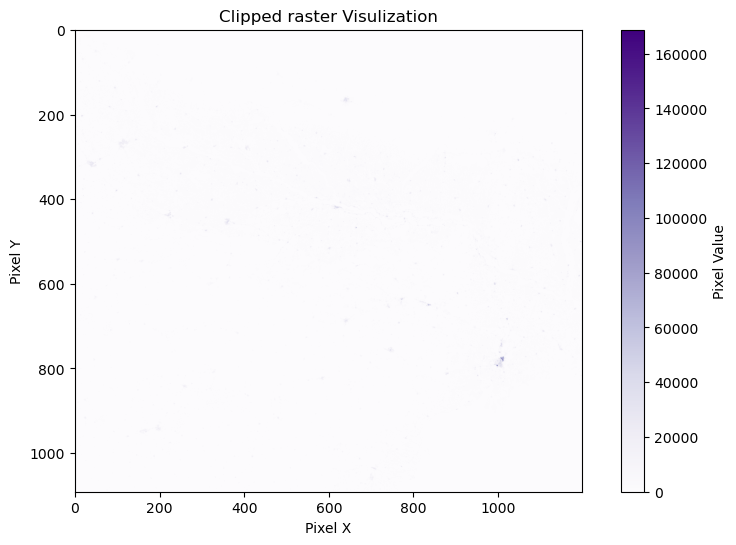

In [4]:
plt.figure(figsize = (10, 6))

plt.imshow(out_image, cmap = 'Purples')
plt.title('Clipped raster Visulization')
plt.xlabel('Pixel X')
plt.ylabel('Pixel Y')
plt.colorbar(label = 'Pixel Value')
plt.show()

The histogram behind

In [5]:
values = out_image.reshape(1, -1)[0]
values[0:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

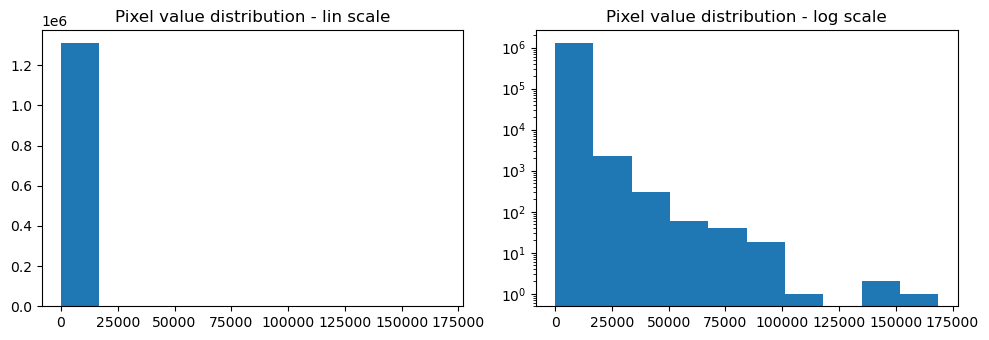

In [6]:
f, ax = plt.subplots(1, 2, figsize = (10, 3.5))

ax[0].hist(values)
ax[0].set_title('Pixel value distribution - lin scale')

ax[1].hist(values)
ax[1].set_title('Pixel value distribution - log scale')
ax[1].set_yscale('log')

plt.tight_layout()

Visualizing raster with matplotlib log scale

In [8]:
import matplotlib.colors as colors

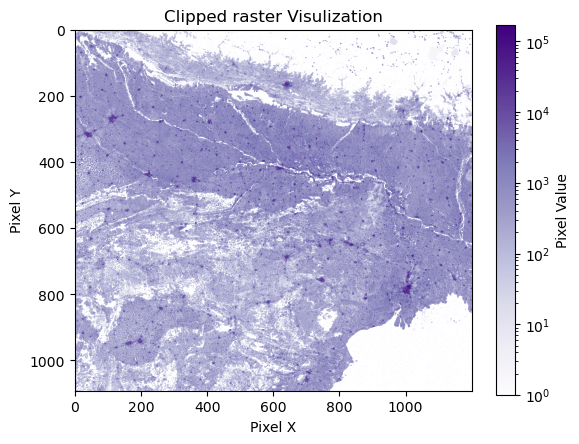

In [10]:
plt.imshow(out_image, 
          cmap = 'Purples',
          norm = colors.LogNorm( vmin = out_image.min() + 1, vmax = out_image.max()))

plt.title('Clipped raster Visulization')
plt.xlabel('Pixel X')
plt.ylabel('Pixel Y')
plt.colorbar(label = 'Pixel Value')
plt.show()

Visualizing raster with Rasterio

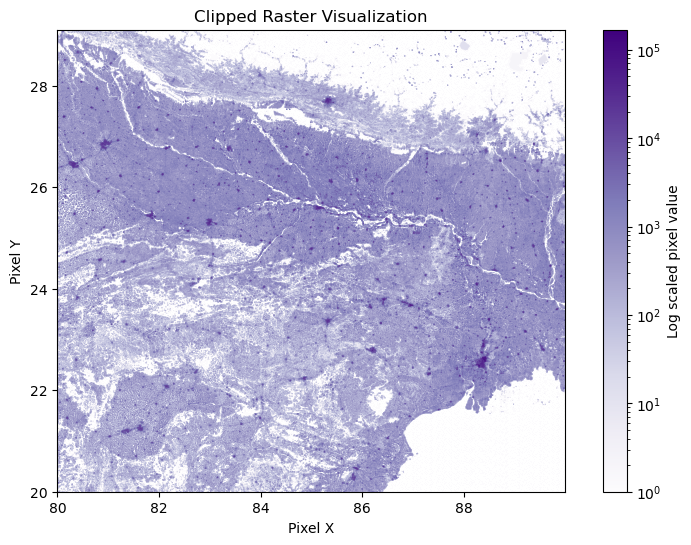

In [18]:
fig, ax = plt.subplots(figsize =(10, 6))

img = show(out_image, 
           transform = out_transform,
           ax = ax,
           cmap = 'Purples', 
           norm = colors.LogNorm( vmin = out_image.min() + 1, vmax = out_image.max()))

cbar = fig.colorbar(img.get_images()[0], ax = ax, label = 'Log scaled pixel value')

ax.set_title('Clipped Raster Visualization')
ax.set_xlabel('Pixel X')
ax.set_ylabel('Pixel Y')

plt.show()